# Portfolio with the Maximum Calmar Ratio for the Auto Sector 

In [1]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Establishing Dates
start = "2017-01-01"
end = "2021-1-1"

# Establishing Assets
assets = ['MARUTI.NS', 'TATAMOTORS.NS', 'M&M.NS', 'BAJAJ-AUTO.NS', 'EICHERMOT.NS', 
         'HEROMOTOCO.NS', 'BALKRISIND.NS', 'BHARATFORG.NS', 'ASHOKLEY.NS']


#252 trading days in a year
N = 252

#1% risk free rate
rf =0.02

# Creating an empty dataframe
df_prices = pd.DataFrame()

# Getting the "Adj Close" data from Yahoo Finance by defining a function
# This function lists the price data as daily percent change 
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = data.DataReader(i, data_source = "yahoo", start=start_date, end=end_date)['Adj Close']
    return dataframe

# Running the function that we just made and saving the results to the DataFrame
df = YahooData(df_prices, assets, start, end)

# Calculating Log Return
df = np.log(df/df.shift(1))

# Dropping the first row because it's N/A
df = df.dropna()

# Viewing df head
df

MARUTI.NS  TATAMOTORS.NS    M&M.NS  BAJAJ-AUTO.NS  EICHERMOT.NS  \
Date                                                                          
2017-01-03   0.007727      -0.012292 -0.005913       0.007935     -0.001033   
2017-01-04  -0.001135       0.011470 -0.000491       0.024477     -0.013612   
2017-01-05   0.023849       0.031354  0.004409       0.014517      0.005743   
2017-01-06  -0.003449      -0.008801 -0.005638      -0.005892      0.017468   
2017-01-09   0.007619       0.004810 -0.013570       0.005819      0.012346   
...               ...            ...       ...            ...           ...   
2020-12-28   0.004950       0.057427  0.000070       0.011768      0.005974   
2020-12-29  -0.004104      -0.015685 -0.005501       0.004922      0.003746   
2020-12-30   0.021315       0.003808  0.019122       0.004826      0.022822   
2020-12-31   0.004809      -0.001630 -0.000139      -0.001190      0.005368   
2021-01-01   0.005436       0.014311  0.016311       0.010743      0.004652   

            HEROMOTOCO.NS  BALKRISIND.NS  BHARATFORG.NS  ASHOKLEY.NS  
Date                                                                  
2017-01-03      -0.014625       0.008697      -0.002600     0.000617  
2017-01-04       0.006125      -0.006172      -0.009097     0.033963  
2017-01-05       0.022003       0.011173       0.009368     0.001192  
2017-01-06      -0.001368      -0.005685      -0.011175     0.015953  
2017-01-09      -0.011838      -0.006039      -0.005166    -0.004112  
...                   ...            ...            ...          ...  
2020-12-28       0.003087       0.000771       0.002276     0.000525  
2020-12-29      -0.002794       0.001636      -0.008276    -0.003153  
2020-12-30       0.008874       0.034969      -0.011239    -0.002107  
2020-12-31       0.002769       0.019164       0.014767     0.006833  
2021-01-01      -0.002366      -0.002555       0.024075     0.037527  

[988 rows x 9 columns]

In [3]:
# Creating 10000 random simulations of each portfolio weight configuration
num_runs = 10000 # number of rows/iterations

# Creating a Matrix with 10000 rows, with each row representing a random portfolio:
    #first 3 columns are Mean Returns, Standard Deviation, and Sortino Ratio
    # remaining columns are each assets random weight within that random portfolio
result = np.zeros((num_runs,(len(assets)+3)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
df = df.copy()

for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(assets))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    ### daily return of the portfolio based on a given set of weights
    df['portfolio_ret'] = df.iloc[:,0]*weights[0]+df.iloc[:,1]*weights[1]+df.iloc[:,2]*weights[2]
  
                       
    # Calculating mean
    E = df['portfolio_ret'].mean()
    
    
    # Annualizing mean
    E = E*252
    

    
    # Calculating Drawdown
    def max_drawdown(return_series):
        comp_ret = (return_series+1).cumprod()
        peak = comp_ret.expanding(min_periods=1).max()
        dd = 1 - (comp_ret/peak)
        return dd.max()

    max_drawdown = max_drawdown(df['portfolio_ret'])
   
    #Calculating Annualised Calmar
    Calmar = E / max_drawdown
    
                   
    # Populating the 'result' array with the required values: Mean, Drawdown, Calmar followed by the weights                   
    result[i,0] = E
    result[i,1] = max_drawdown
    result[i,2] = Calmar
    
    for j in range(len(assets)):
        result[i,j+3]= weights[j]

In [5]:
# Converting 'result' into a DataFrame

columns = ['Mean','Drawdown', 'Calmar'] + assets

result = pd.DataFrame(result,columns=columns)
result

Mean  Drawdown    Calmar  MARUTI.NS  TATAMOTORS.NS    M&M.NS  \
0    -0.038768  0.341970 -0.113366   0.040092       0.178204  0.015929   
1    -0.022149  0.423638 -0.052282   0.069147       0.157593  0.177265   
2    -0.002091  0.360233 -0.005804   0.116712       0.091662  0.161637   
3     0.008887  0.282160  0.031496   0.105553       0.038989  0.146686   
4     0.007954  0.189984  0.041866   0.126777       0.028871  0.043718   
...        ...       ...       ...        ...            ...       ...   
9995 -0.008606  0.323278 -0.026622   0.109420       0.101191  0.097361   
9996 -0.000331  0.336901 -0.000983   0.205345       0.094821  0.043858   
9997 -0.026846  0.495129 -0.054221   0.212364       0.212103  0.071759   
9998 -0.007402  0.171046 -0.043276   0.021984       0.053692  0.065999   
9999 -0.057197  0.482110 -0.118639   0.071847       0.270273  0.033401   

      BAJAJ-AUTO.NS  EICHERMOT.NS  HEROMOTOCO.NS  BALKRISIND.NS  \
0          0.190681      0.149956       0.111934       0.194134   
1          0.043606      0.172874       0.176178       0.049591   
2          0.081127      0.196534       0.023181       0.181605   
3          0.135661      0.112412       0.130462       0.145362   
4          0.110019      0.128017       0.074268       0.085100   
...             ...           ...            ...            ...   
9995       0.184088      0.189169       0.070544       0.009387   
9996       0.031550      0.152021       0.151579       0.094680   
9997       0.079663      0.129921       0.213599       0.036792   
9998       0.123759      0.240909       0.004180       0.320185   
9999       0.036302      0.139232       0.079794       0.212690   

      BHARATFORG.NS  ASHOKLEY.NS  
0          0.097613     0.021458  
1          0.110641     0.043107  
2          0.132895     0.014647  
3          0.144696     0.040179  
4          0.177288     0.225941  
...             ...          ...  
9995       0.131980     0.106861  
9996       0.189821     0.036323  
9997       0.022466     0.021332  
9998       0.076189     0.093101  
9999       0.085831     0.070631  

[10000 rows x 12 columns]

In [6]:
Max_Calmar = result.iloc[result['Calmar'].idxmax()]
Max_Calmar

Mean             0.030706
Drawdown         0.258967
Calmar           0.118571
MARUTI.NS        0.293882
TATAMOTORS.NS    0.000797
M&M.NS           0.028318
BAJAJ-AUTO.NS    0.014437
EICHERMOT.NS     0.173836
HEROMOTOCO.NS    0.116363
BALKRISIND.NS    0.019008
BHARATFORG.NS    0.250243
ASHOKLEY.NS      0.103115
Name: 3358, dtype: float64

In [7]:
Min_Drawdown = result.iloc[result['Drawdown'].idxmin()]
Min_Drawdown

Mean             0.001157
Drawdown         0.038534
Calmar           0.030036
MARUTI.NS        0.000923
TATAMOTORS.NS    0.001824
M&M.NS           0.028138
BAJAJ-AUTO.NS    0.155610
EICHERMOT.NS     0.160427
HEROMOTOCO.NS    0.076671
BALKRISIND.NS    0.263802
BHARATFORG.NS    0.094610
ASHOKLEY.NS      0.217996
Name: 8172, dtype: float64

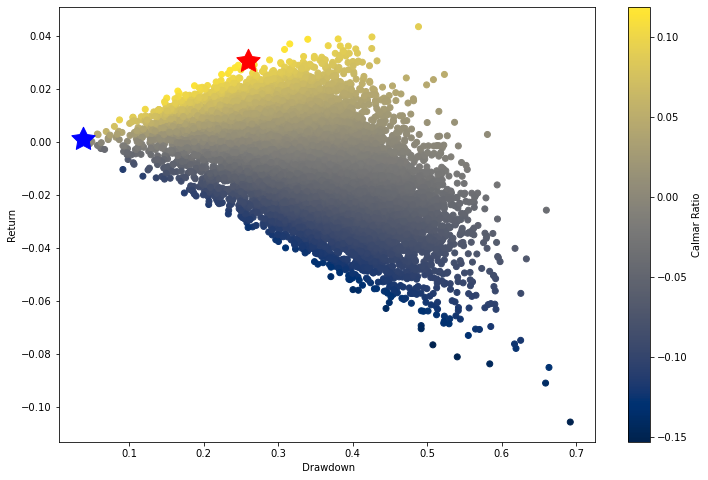

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(x=result['Drawdown'],y=result['Mean'],c=result['Calmar'],cmap='cividis')
plt.colorbar(label='Calmar Ratio')
plt.xlabel(' Drawdown')
plt.ylabel('Return')

#plt.title('Calmar Ratio - Auto Sector')
#Plot a red star to highlight position of the portfolio with highest Sortino Ratio
plt.scatter(Max_Calmar[1],Max_Calmar[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_Drawdown[1],Min_Drawdown[0],marker=(5,1,0),color='b',s=600)
plt.show()